In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.cm as cm


In [2]:
assessor_dir = 'datasets/assessorSequential.csv'
df = pd.read_csv(assessor_dir)

In [3]:
df.head(5)

,Unnamed: 0,Date.Sampled,Address,X1st.Draw,X2nd.Draw,X3rd.Draw,X4th.Draw,X5th.Draw,X6th.Draw,X7th.Draw,...,X11th.Draw,PIN,Township Code,Neighborhood Code,Sale Price,Age,ZIP,Longitude,Latitude,Tract Median Income
0,0,9/4/2019,100XX S BELL AVE,1.52,1.37,1.59,2.53,2.44,1.90,2.45,...,4.35,25-07-311-006-0000,72.0,72271.0,280000.0,94.0,60643-1903,-87.677779,41.710994,122727.0
1,1,7/16/2016,100XX S CALHOUN AVE,3.70,2.62,8.83,13.80,13.20,13.60,12.30,...,2.75,26-07-150-042-0000,70.0,70180.0,NaN,72.0,60617-5354,-87.561811,41.713056,44423.0
2,2,12/17/2019,100XX S CALUMET AVE,4.02,5.35,6.97,6.55,17.70,16.60,12.10,...,8.72,25-10-313-023-0000,70.0,70220.0,NaN,72.0,60628-2122,-87.615468,41.712462,40612.0
3,3,12/14/2019,100XX S CARPENTER ST,9.54,7.31,6.95,5.63,4.91,7.15,12.40,...,7.23,25-08-410-026-0000,72.0,72282.0,NaN,70.0,60643-2248,-87.649387,41.711889,37207.0
4,4,7/14/2021,100XX S CARPENTER ST,14.00,11.00,8.83,8.12,8.69,7.14,11.00,...,NaN,25-08-410-039-0000,72.0,72282.0,NaN,66.0,60643-2248,-87.649360,41.710831,37207.0


In [4]:
df = df.drop(columns=['Unnamed: 0','X11th.Draw','PIN','Township Code','Neighborhood Code','Age','Longitude','Latitude'])

In [5]:
draw_col = df.columns[2:12]
draw_col

Index(['X1st.Draw', 'X2nd.Draw', 'X3rd.Draw', 'X4th.Draw', 'X5th.Draw',
       'X6th.Draw', 'X7th.Draw', 'X8th.Draw', 'X9th.Draw', 'X10th.Draw'],
      dtype='object')

In [6]:
df['avg_draw'] = df[draw_col].mean(axis=1)
df = df.drop(columns=draw_col)

In [7]:
df.head(5)

,Date.Sampled,Address,Sale Price,ZIP,Tract Median Income,avg_draw
0,9/4/2019,100XX S BELL AVE,280000.0,60643-1903,122727.0,2.433
1,7/16/2016,100XX S CALHOUN AVE,NaN,60617-5354,44423.0,9.866
2,12/17/2019,100XX S CALUMET AVE,NaN,60628-2122,40612.0,10.399
3,12/14/2019,100XX S CARPENTER ST,NaN,60643-2248,37207.0,8.663
4,7/14/2021,100XX S CARPENTER ST,NaN,60643-2248,37207.0,9.280


In [8]:
df.shape

(1807, 6)

In [9]:
df[~df.isin(['NaN', 'NaT']).any(axis=1)]
df.shape
df.dropna(inplace=True)
df.shape

(149, 6)

In [10]:
df.head(5)

,Date.Sampled,Address,Sale Price,ZIP,Tract Median Income,avg_draw
0,9/4/2019,100XX S BELL AVE,280000.0,60643-1903,122727.0,2.433
17,12/20/2016,102XX S ARTESIAN AVE,219000.0,60655-1049,98281.0,5.192
20,9/17/2019,102XX S OGLESBY AVE,147400.0,60617-5630,30069.0,27.250
21,9/28/2016,103XX S HAMILTON AVE,330000.0,60643-2415,110344.0,6.315
36,10/10/2019,105XX S CENTRAL PARK AVE,280000.0,60655-3202,100361.0,10.505


In [11]:
import datetime

In [12]:
df["Date.Sampled"] = pd.to_datetime(df["Date.Sampled"])

In [13]:
df['Year'] = df['Date.Sampled'].dt.year

In [14]:
df.head(5)

,Date.Sampled,Address,Sale Price,ZIP,Tract Median Income,avg_draw,Year
0,2019-09-04,100XX S BELL AVE,280000.0,60643-1903,122727.0,2.433,2019
17,2016-12-20,102XX S ARTESIAN AVE,219000.0,60655-1049,98281.0,5.192,2016
20,2019-09-17,102XX S OGLESBY AVE,147400.0,60617-5630,30069.0,27.250,2019
21,2016-09-28,103XX S HAMILTON AVE,330000.0,60643-2415,110344.0,6.315,2016
36,2019-10-10,105XX S CENTRAL PARK AVE,280000.0,60655-3202,100361.0,10.505,2019


<Figure size 640x480 with 0 Axes>

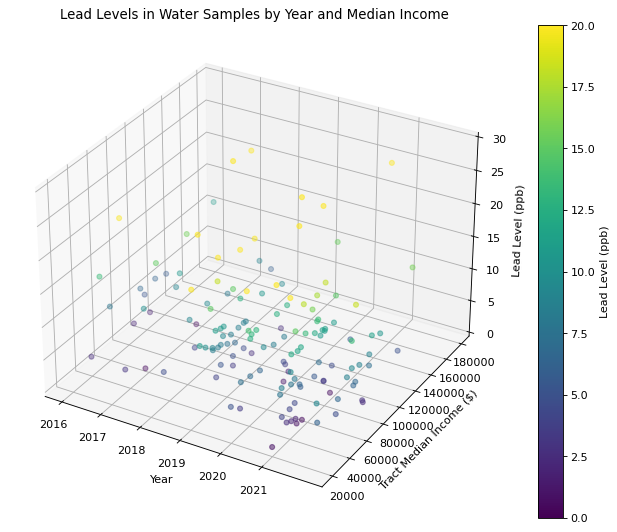

In [15]:
fig = plt.figure()
fig = plt.figure(figsize = (12, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
pnt3d = ax.scatter3D(df['Year'], df['Tract Median Income'], df['avg_draw'],c=df['avg_draw'] ,vmin=0, vmax=20)
cbar=plt.colorbar(pnt3d)
cbar.set_label("Lead Level (ppb)")
#set colorbar range


fig.set_facecolor('white')
ax.set_facecolor('white')
plt.xticks(np.arange(2016, 2022, 1))
ax.set_zlim3d(0, 30)
ax.set_title('Lead Levels in Water Samples by Year and Median Income')
ax.set_xlabel('Year')
ax.set_ylabel('Tract Median Income ($)')
ax.set_zlabel('Lead Level (ppb)')
plt.show()

In [16]:
%matplotlib notebook
fig = plt.figure()
fig = plt.figure(figsize = (12, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')
pnt3d = ax.scatter3D(df['Sale Price'], df['Tract Median Income'], df['avg_draw'],c=df['avg_draw'] ,vmin=0, vmax=20)
cbar=plt.colorbar(pnt3d)
cbar.set_label("Lead Level (ppb)")
#set colorbar range
plt.yticks(rotation=90)

fig.set_facecolor('white')
ax.set_facecolor('white')
# plt.xticks(np.arange(2016, 2022, 1))
ax.set_xlim3d(0, 1000000)
ax.set_zlim3d(0, 30)
ax.set_title('Lead Levels in Water Samples by Sales Price, Tract Median Income, and Mean Lead Level')
ax.set_xlabel('Sale Price ($)')
ax.set_ylabel('Tract Median Income ($)',labelpad=20)
ax.set_zlabel('Lead Level (ppb)')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import matplotlib.animation as animation
def rotate(angle):
    ax.view_init(azim=angle)

print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
rot_animation.save('3dplot.gif', dpi=80, writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


Making animation
